# <b>1 <span style='color:#0386f7de'>|</span> Introduction</b>

**Context**
<br>An employee is an asset for every company. They help companies to grow in size & quality. However, [many factors](https://www.researchgate.net/publication/322896996_Employee_Attrition_and_Employee_Retention-Challenges_Suggestions#:~:text=Among%20all%20employee%20related%20problems,given%20for%20Attrition%20is%20attrition) could cause an employee decreasing their performance and it will produce a problem to the quality of their work, and then eventually they will leave or resign because the dissatisfactions they feel. An employee attrition problem is the problem which we could analyze and find insights to overcome the problem in the future.

<br>

**Needs**
<br>What are the best predictor of the employee attrition problem? How to overcome the problem from knowing the best predictors.

<br>

**Vision**
<br>The company (HR department to be specific) could analyze which predictors have a huge influence to an employee attrition problem. Then they could develop programs to retain employees

<br>

**Outcome**
<br>The company could retain the best employees who make the organizations more profitable.

---

### EDA Note

<br>

__Data Structure__
- no missing data found
- a different scale of data values
- high cardinality features ("JobRole", "EducationField")


__Data Quality__
- outliers found
- not useful features ("Over18", "EmployeeCount", "EmployeeNumber", "PerformanceRating", "StandardHours")
- multicollinearity found
- imbalance target column data values ("Attrition" column)

__Data Cleaning__
- drop not useful features (Done)
- drop multicollinear ("YearsWithCurrManager", "YearsInCurrentRole", "JobLevel") (Done)

__Data Exploration - Insight__


Relationship between =
- Age & Attrition= The youngster tends toward an attrition
- MonthlyIncome & Attrition = The lower income tends toward an attrition
- DistanceFromHome & Attrition = No clear relationship between these columns
- PercentSalaryHike & Attrition = The lower percent of salary hike tends toward an attrition
- YearsAtCompany & Attrition = The lower years at company tends toward an attrition
- YearsSinceLastPromotion & Attrition = The lower years since last promotion tends toward an attrition
- WorkLifeBalance & Attrition = The lower WorkLifeBalance number tends toward an attrition
- EnvironmentSatisfaction & Attrition = The lower EnvironmentSatisfaction tends toward an attrition
- JobRole & Attrition = Any jobrole related to "Sales" tends toward an attrition
- OverTime & Attrition = The one who feels overtime in their work tends toward an attrition

These insights above could be recommendations of programs or treatments to lower the number of employee attrition problems.
From the insights, the improvements or changes could be made on the company itself & the employee.
The improvements we could make on the company itself such as, programs to improve work life balance & working environment.
Then the changes we could make on the employees are related to the employee recruitment process. In order to decrease the employee attrition problem, we could include criteria such as "we need the experienced person in the field", "we need the one who could work under pressure" (because the number of overtime is high)
However, what are the most important features/predictors for the problem, so we could make a program priority list? Let's find top 5 of predictors!


__Feature Engineering__
- no need to fill missing value (Done)
- outliers dropped (Done)
- grouping high cardinality feature data values ("JobRole", "EducationField") (Done)
- encode categorical features (Done)
- a scaling is needed (Done)
- balance target column (Done)

---

### Modeling Note

Baseline Model = Logistic Regression
<br>
Proposed Models = SVC, DecisionTreeClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
<br>
Benchmark parameter = AUC
<br>
From the graph show AUC of each proposed model, proceeds to use a RandomForestClassifier for the final model.




Hyperparameter Tuning = RandomForestClassifier<br>
Final Model AUC = 0.74<br>

<br>

__Top 5 feature importances__ =
1. MontlyIncome
2. Age
3. TotalWorkingYears
4. DailyRate
5. HourlyRate


<br>

__Recommendation__ =

I read & found some interesting articles[[1]](https://www.researchgate.net/publication/322896996_Employee_Attrition_and_Employee_Retention-Challenges_Suggestions#:~:text=Among%20all%20employee%20related%20problems,given%20for%20Attrition%20is%20attrition.), [[2]](https://blog.perceptyx.com/employee-attrition-analytics). They show that the employee attrition problems are unique problems, and then they need unique approaches to address them. The problems in one company could be different with others. __To address the employee attrition problem__ looking from the top 5 feature importances in the model, the company should =
1. Pay attention to the employee rewards (Show by the  MonthlyIncome, DailyRate, HourlyRate). At least the rewards are competitive enough with other company (competitor).
2. Take care of the youngster (Show by the Age, TotalWorkingYears). The company should make sure that the environment, responsibilities, and challenges are proper for the youngster. A mentorship program could be applied.
3. Consider to recruit more experienced employees (Show by the Age, TotalWorkingYears) instead of the youngster.

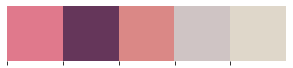

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Setting
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
pd.pandas.set_option('display.max_columns',None)

In [177]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold, learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, plot_confusion_matrix

# <b>2 <span style='color:#0386f7de'>|</span> EDA</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#152D35;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:#FCFFA6;"><b>2.1 | Structure Investigation</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [4]:
base = os.getcwd()
main_df = pd.read_csv(base+"\\datasets\\HR Employee Attrition.csv")
df = main_df.copy()
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [17]:
print(f"Shape = {df.shape}")

Shape = (1470, 35)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
pd.value_counts(df.dtypes)

int64     26
object     9
dtype: int64

In [24]:
df.describe(include='number')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
df.describe(exclude='number')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


<div style="color:white;display:fill;border-radius:8px;
            background-color:#152D35;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:#FCFFA6;"><b>2.2 | Quality Investigation</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

In [5]:
def detect_outliers(df, n, num_features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """

    from collections import Counter
    outlier_indices = []
    
    for col in num_features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
       
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) # convert it into counter      
    # if outlier count (v variable) is greater than n=0, will be 
    # inserted inside variable
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers


num_col_sel = df.describe(include='number').columns
nonnum_col_sel = df.drop(labels="Attrition", axis=1).describe(exclude='number').columns
Outliers_to_drop=detect_outliers(df, 0, num_col_sel)
# Outliers_to_drop

In [5]:
df.drop(labels=Outliers_to_drop, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
df.shape

(779, 35)

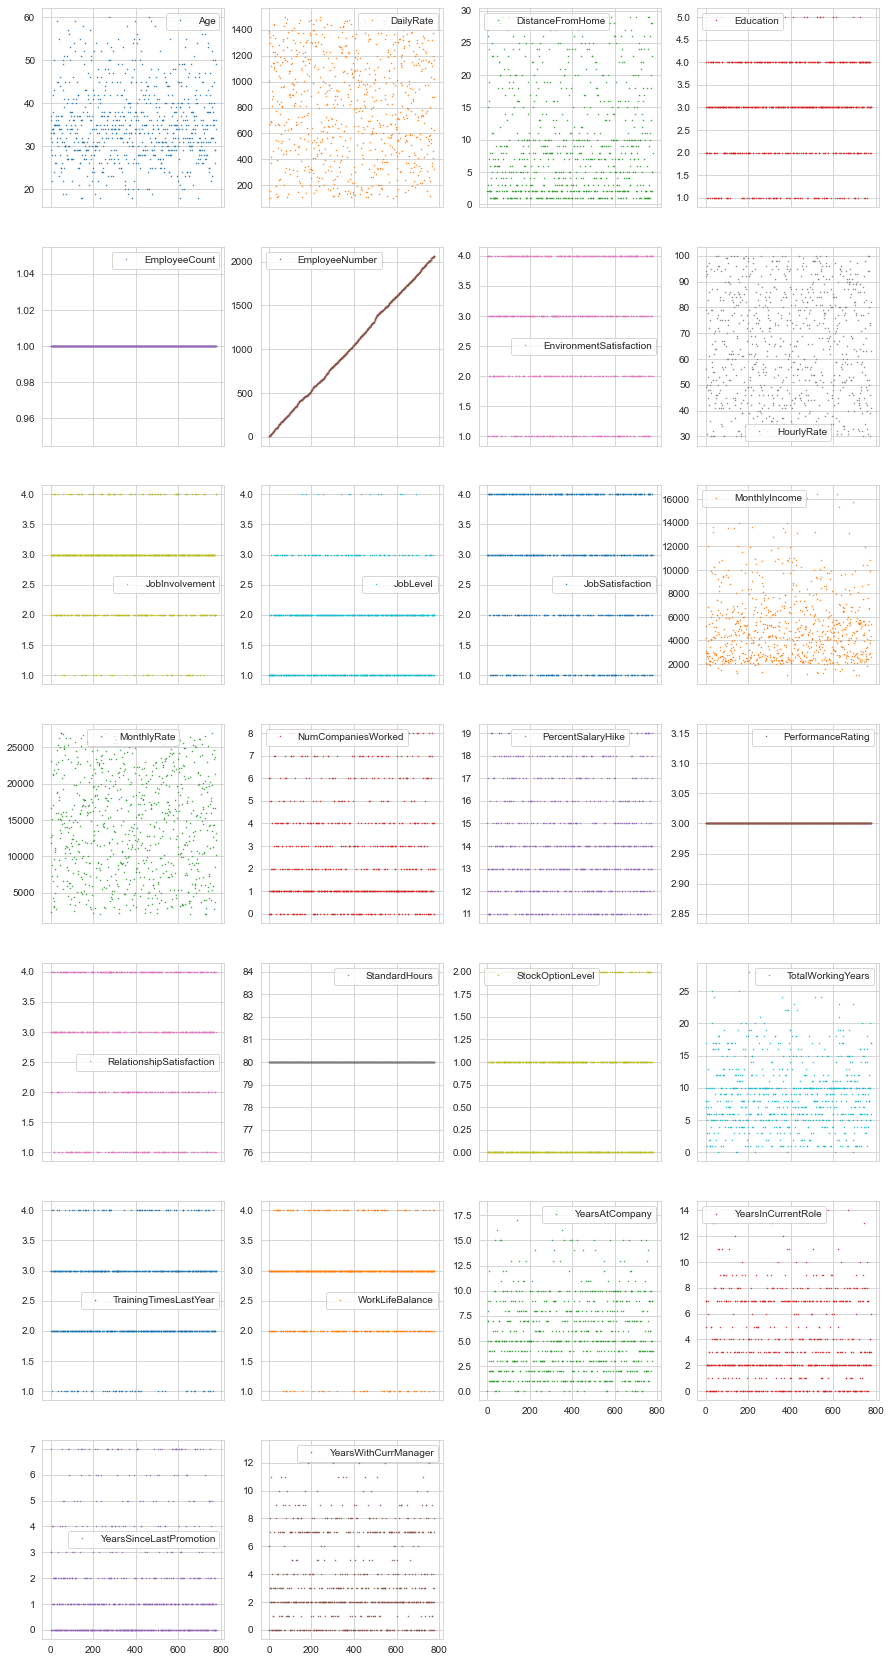

In [46]:
df[num_col_sel].plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1);

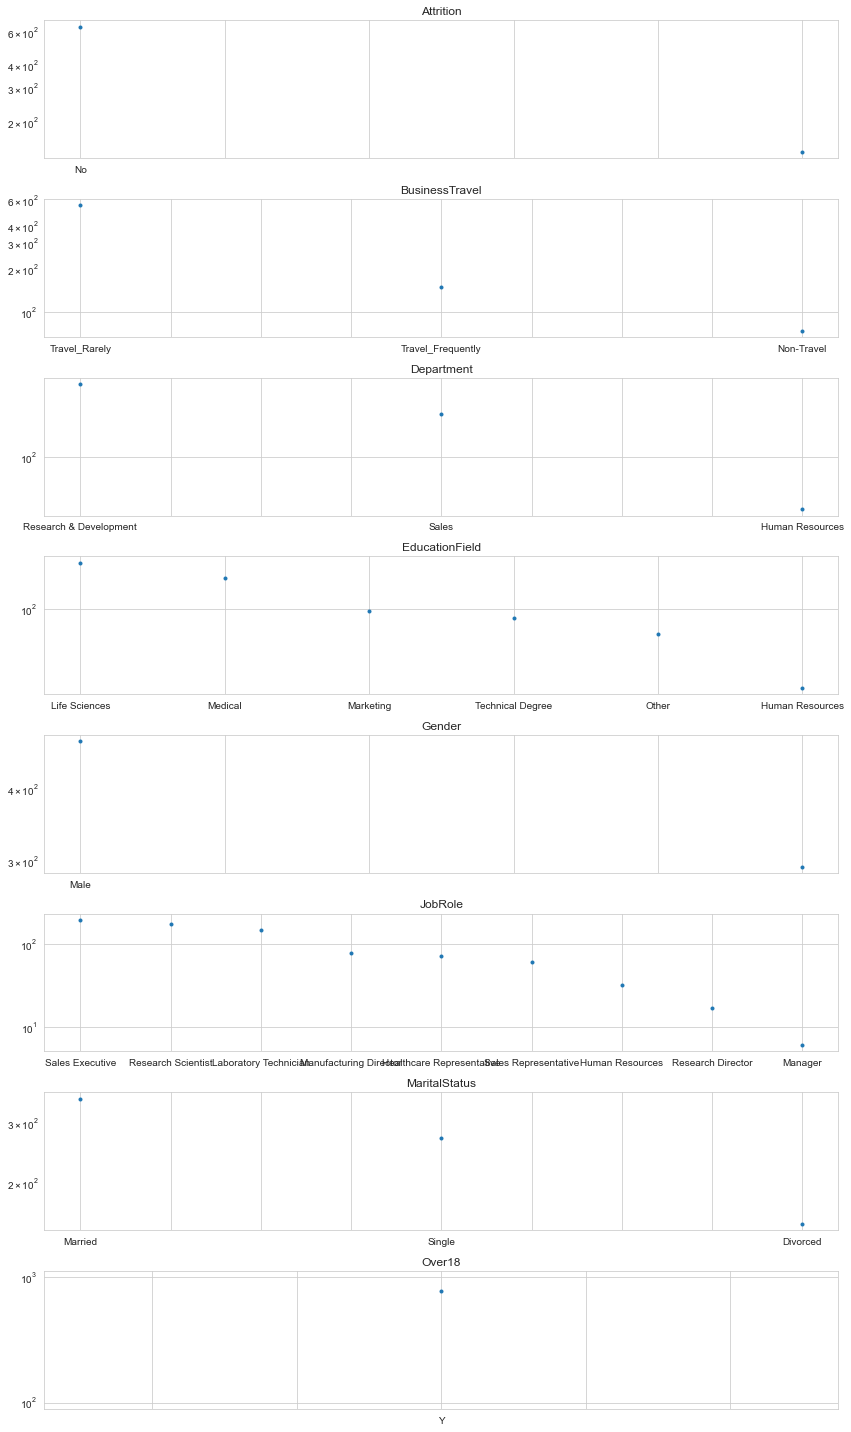

In [48]:
# visualization of unwatned entries in the nonnumerical features
fig, axes = plt.subplots(ncols=1, nrows=len(nonnum_col_sel), figsize=(12, 20))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [13]:
def collinear_feat(df, threshold):
    """ get pair of columns which has high correlation """
    collinear = []

    for col in df.corr().columns:
        # iteration for each columns
        if col == 'Attrition':
            continue

        else:
            # iteration for each correlation values
            for index, item in pd.DataFrame(df.corr()[col]).iterrows():
                if index == col:
                    continue
                else:
                    if item.values[0] > threshold:
                        if ((f'{index} & {col}') in collinear) or ((f'{col} & {index}') in collinear):
                            continue
                        else:
                            collinear.append(f'{index} & {col}')
    return collinear

collinear_feats = collinear_feat(df, 0.8)
collinear_feats

['MonthlyIncome & JobLevel',
 'YearsInCurrentRole & YearsAtCompany',
 'YearsWithCurrManager & YearsAtCompany']

In [15]:
col_to_drop = ["YearsWithCurrManager", 
               "YearsInCurrentRole", 
               "JobLevel", 
               "Over18", 
               "EmployeeCount", 
               "EmployeeNumber", 
               "PerformanceRating", 
               "StandardHours"]

df.drop(labels=col_to_drop, axis=1, inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:Red;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:White;"><b>Checkpoint</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [158]:
def dump_pkl(file, dump_name):
    import pickle
    with open(dump_name, 'wb') as f:   
        pickle.dump(file, f)
    return None
    
def load_pkl(load_name):
    import pickle
    with open(load_name, 'rb') as f:
        file = pickle.load(f)
    return file

# checkpoint
dump_pkl(df, 'df_2_2.pkl')

In [108]:
df = load_pkl('.\\datasets\\df_2_2.pkl')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,3
2,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,Laboratory Technician,4,Single,3068,11864,0,No,13,3,0,8,2,2,7,3
3,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,Healthcare Representative,3,Married,5237,16577,6,No,13,2,2,17,3,2,7,7
4,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,4,0,10,3,3,9,0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#152D35;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:#FCFFA6;"><b>2.3 | Content Investigation</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

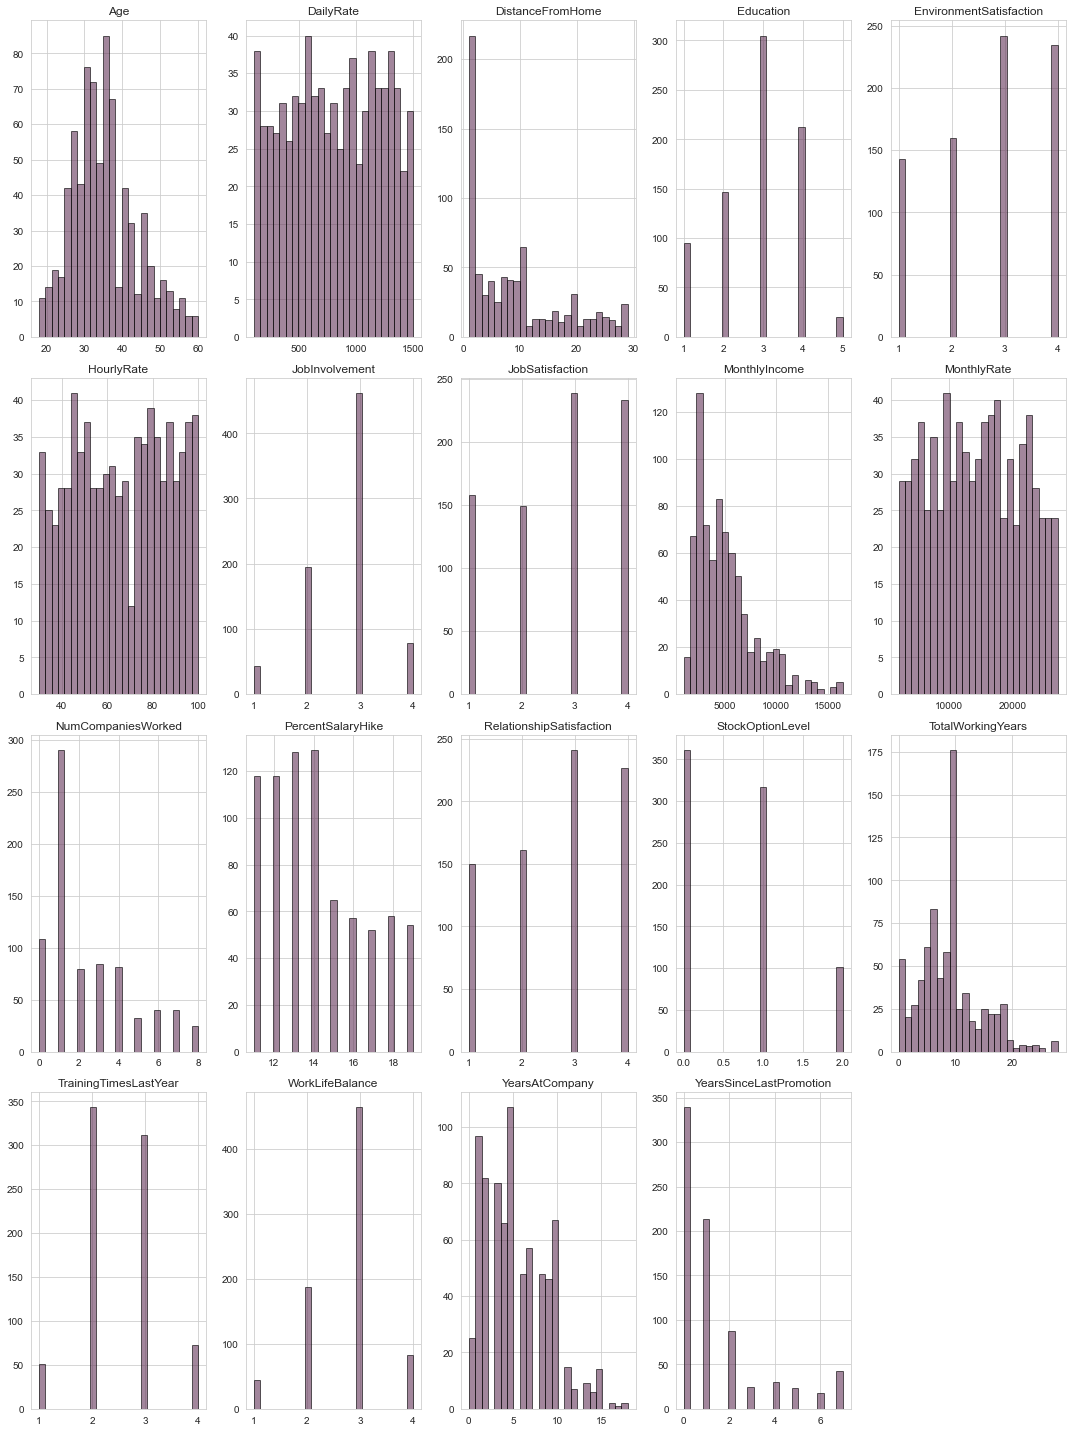

In [121]:
# numerical features distribution
df.hist(bins=25,
        figsize=(15,20),
        layout=(-1,5),
        edgecolor="black",
       color=colors_nude[1],
        alpha = 0.6
       )
plt.tight_layout();

<AxesSubplot:>

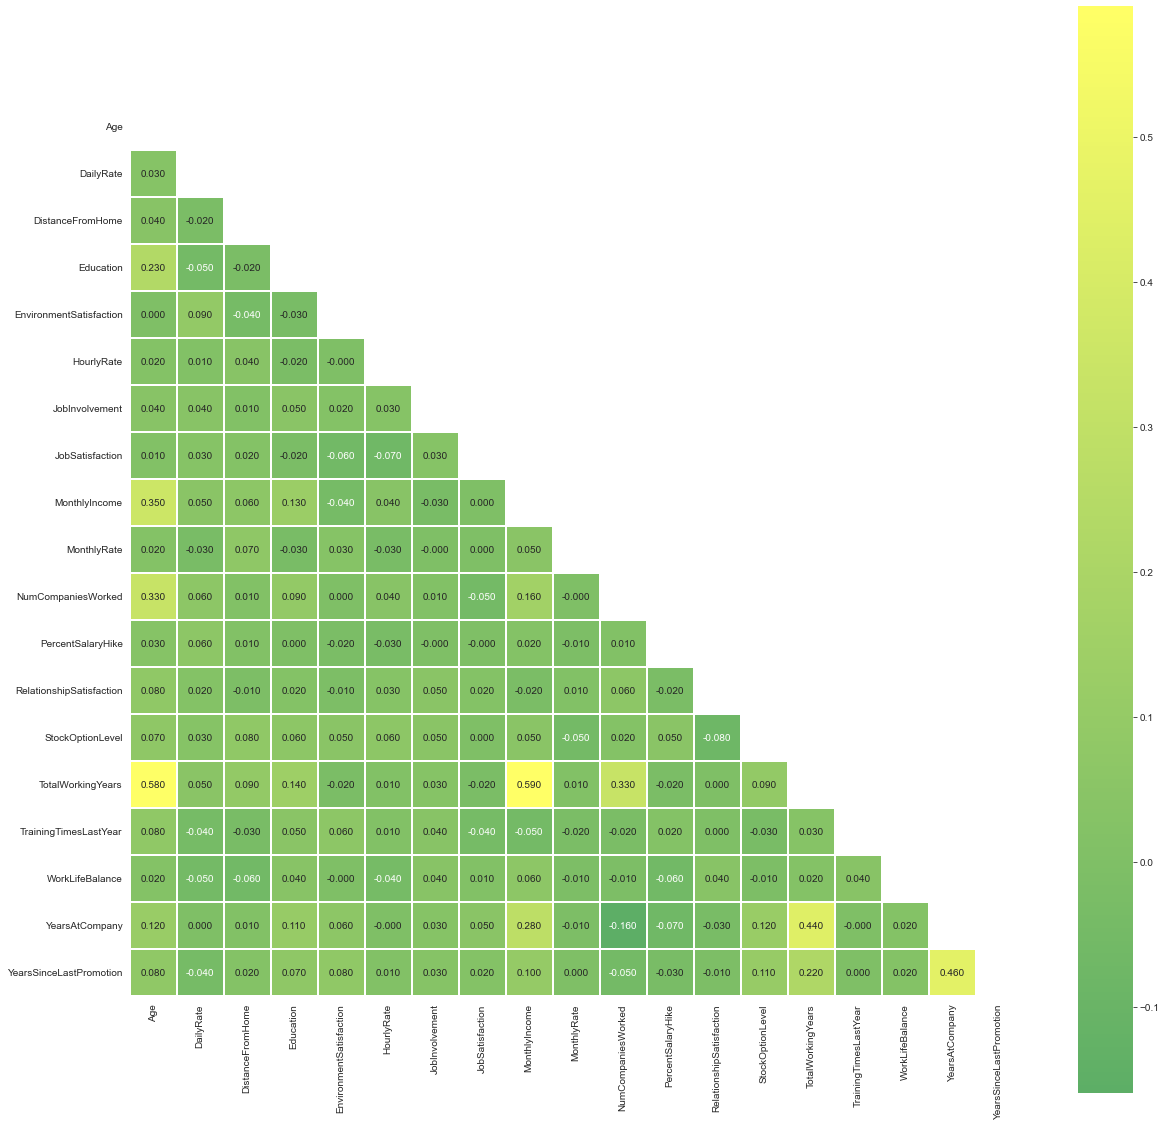

In [111]:
matrix = df.corr().round(2)

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap (matrix, center=0, fmt=".3f", square=True, 
annot=True, linewidth=.3, mask=mask, cmap='summer')

In [127]:
df_cat = df.select_dtypes(exclude="number")
df_num = df.select_dtypes(include="number")

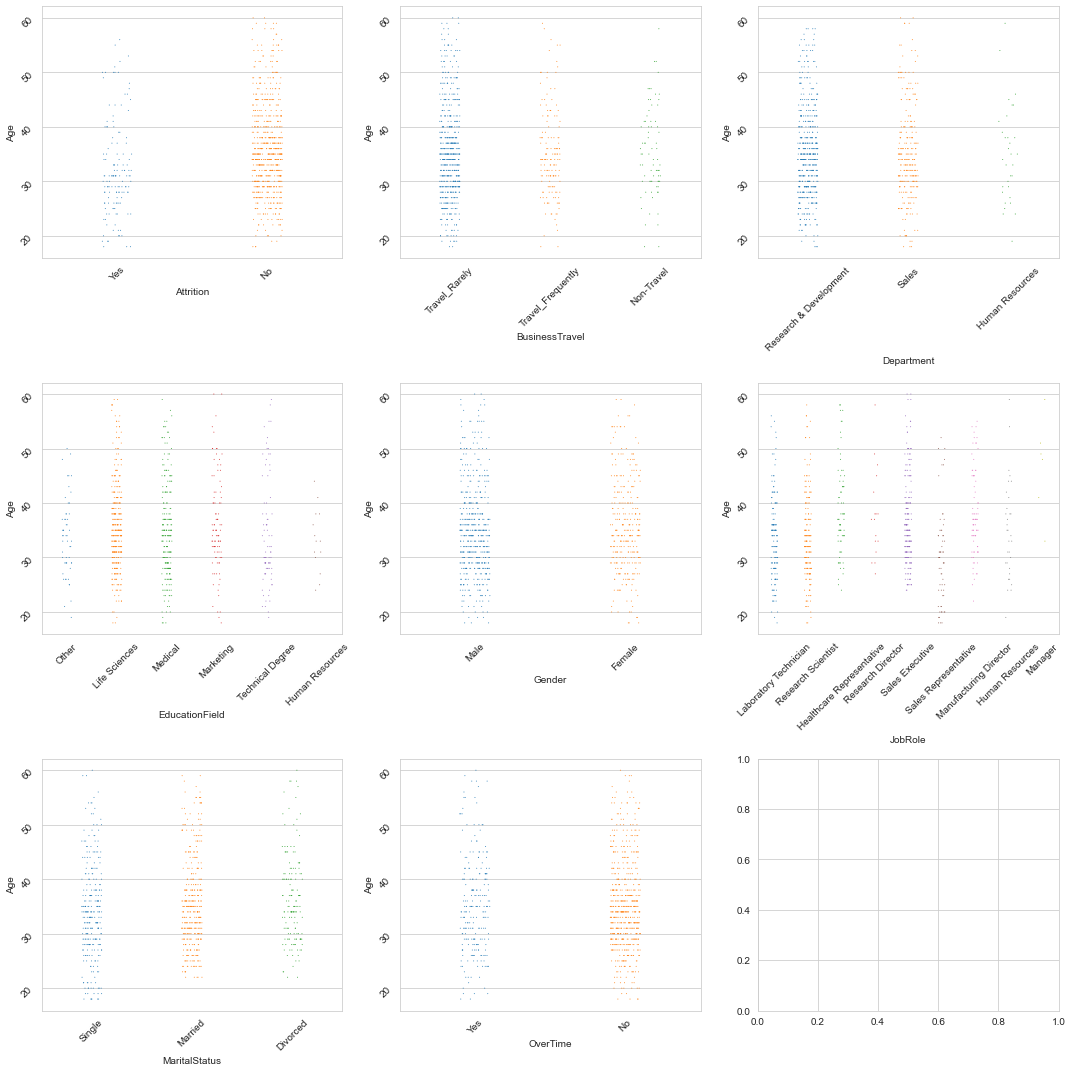

In [126]:
# Establish number of columns and rows needed to plot all features
n_cols = 3
n_elements = len(df_cat.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df["Age"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(
  ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_cat.columns, axes.ravel()):
    sns.stripplot(data=df, x=col, y=y_value, ax=ax,
                  palette="tab10", size=1, alpha=0.9)
    ax.tick_params(labelrotation=45)

plt.tight_layout();

<div style="color:white;display:fill;border-radius:8px;
            background-color:#152D35;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:#FCFFA6;"><b>2.4 | Data Exploration</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,3
2,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,Laboratory Technician,4,Single,3068,11864,0,No,13,3,0,8,2,2,7,3
3,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,Healthcare Representative,3,Married,5237,16577,6,No,13,2,2,17,3,2,7,7
4,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,4,0,10,3,3,9,0


<br>

**any relationship between Age & Attrition?**

<br>

In [73]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "Age"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of Age in the Attrition = No (36.01); Yes (32.17)
Median of Age in the Attrition = No (35.0); Yes (31.0)


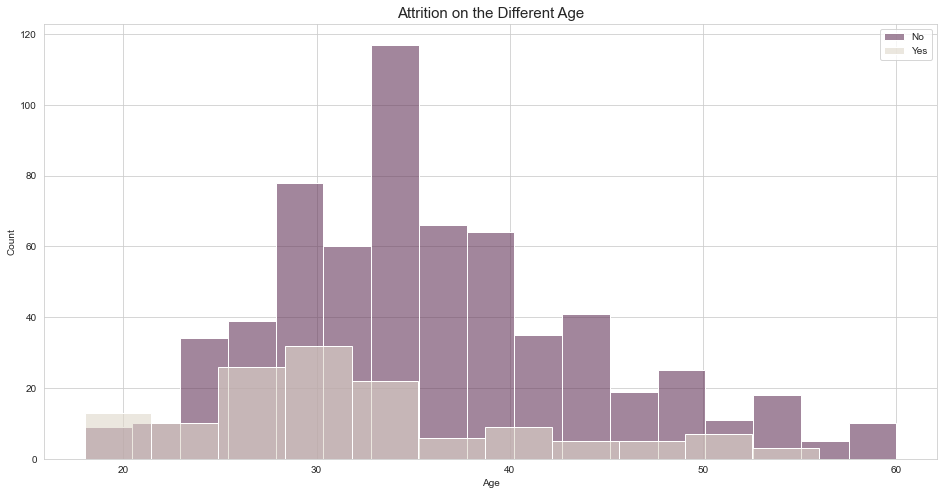

In [59]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between MonthlyIncome & Attrition?**

<br>

In [72]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "MonthlyIncome"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of MonthlyIncome in the Attrition = No (5312.92); Yes (4106.53)
Median of MonthlyIncome in the Attrition = No (4680.0); Yes (2946.0)


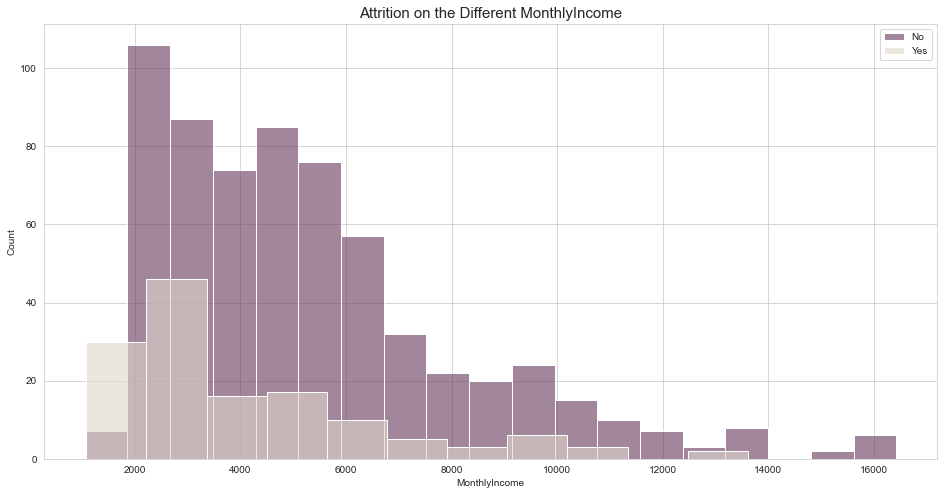

In [61]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between DistanceFromHome & Attrition?**

<br>

In [71]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "DistanceFromHome"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of DistanceFromHome in the Attrition = No (9.14); Yes (10.76)
Median of DistanceFromHome in the Attrition = No (7.0); Yes (9.0)


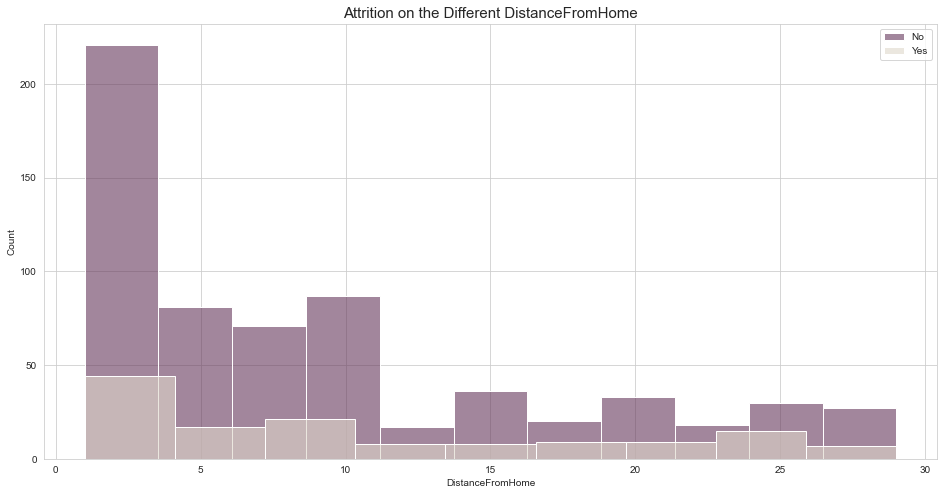

In [63]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between PercentSalaryHike & Attrition?**

<br>

In [70]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "PercentSalaryHike"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of PercentSalaryHike in the Attrition = No (14.23); Yes (13.8)
Median of PercentSalaryHike in the Attrition = No (14.0); Yes (13.0)


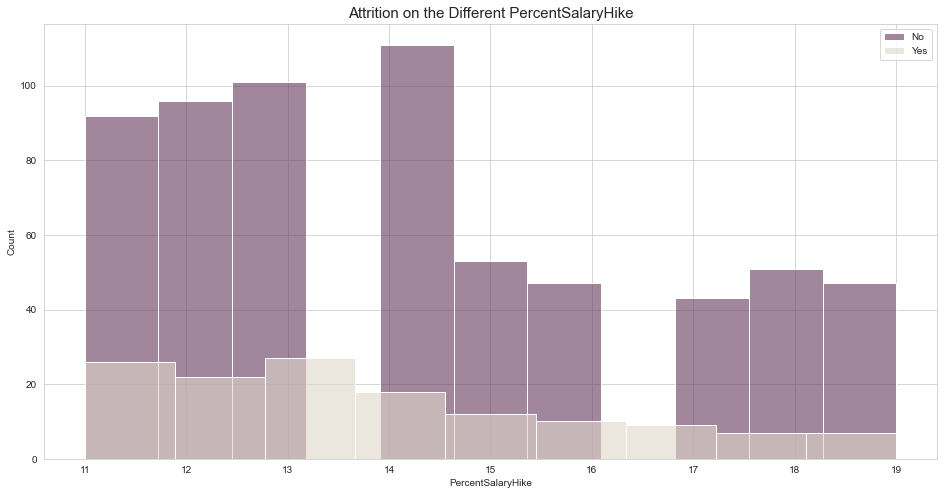

In [65]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between YearsAtCompany & Attrition?**

<br>

In [69]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "YearsAtCompany"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of YearsAtCompany in the Attrition = No (5.71); Yes (3.89)
Median of YearsAtCompany in the Attrition = No (5.0); Yes (3.0)


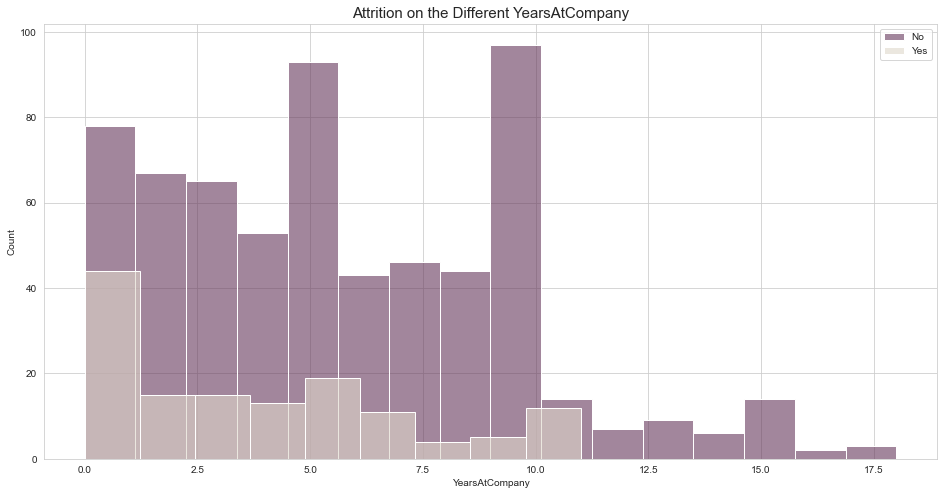

In [67]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between YearsSinceLastPromotion & Attrition?**

<br>

In [74]:
attrition_mean = df.groupby(by='Attrition').mean()
attrition_median = df.groupby(by='Attrition').median()

focus_feature = "YearsSinceLastPromotion"

print(f'Mean of {focus_feature} in the Attrition = No ({np.round(attrition_mean[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_mean[focus_feature].loc["Yes"],2)})')
print(f'Median of {focus_feature} in the Attrition = No ({np.round(attrition_median[focus_feature].loc["No"],2)}); Yes ({np.round(attrition_median[focus_feature].loc["Yes"],2)})')

Mean of YearsSinceLastPromotion in the Attrition = No (1.44); Yes (1.36)
Median of YearsSinceLastPromotion in the Attrition = No (1.0); Yes (0.5)


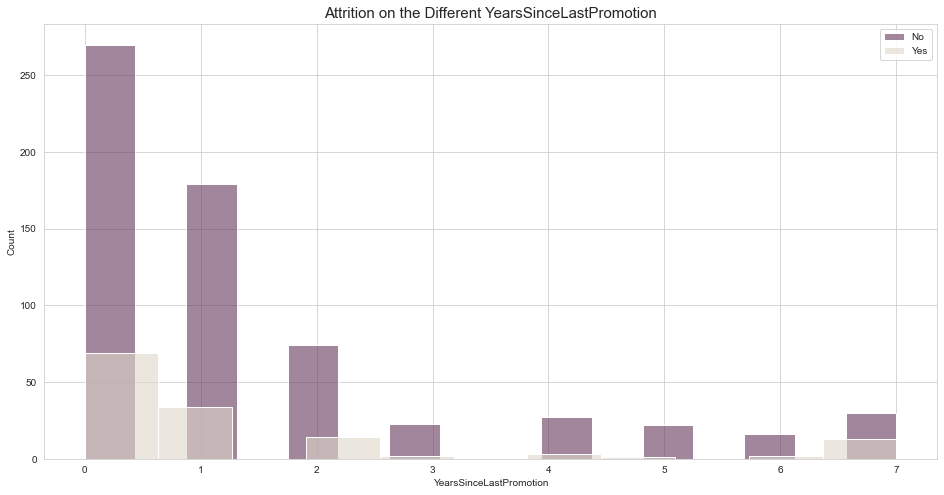

In [75]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['Attrition'] =='No'] ,  x = focus_feature,color = colors_nude[1] ,label = 'No' ,alpha = 0.6)
sns.histplot(data =df[df['Attrition'] =='Yes'] ,  x = focus_feature ,color = colors_nude[-1]  ,label = 'Yes' ,alpha = 0.6)

plt.title(f'Attrition on the Different {focus_feature}',size = 15)
plt.legend()
plt.show()

<br>

**any relationship between WorkLifeBalance & Attrition?**

<br>

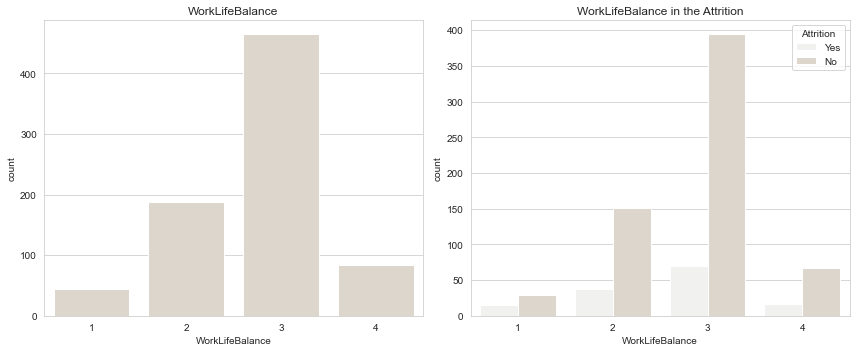

In [106]:
focus_feat = 'WorkLifeBalance'

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.countplot(ax=axes[0], data=df, x=focus_feat, color = colors_nude[-1])
axes[0].set_title(f'{focus_feat}')

sns.countplot(ax=axes[1], data=df, x=focus_feat, color = colors_nude[-1], hue='Attrition')
axes[1].set_title(f'{focus_feat} in the Attrition')

plt.tight_layout();

<br>

**any relationship between EnvironmentSatisfaction & Attrition?**

<br>

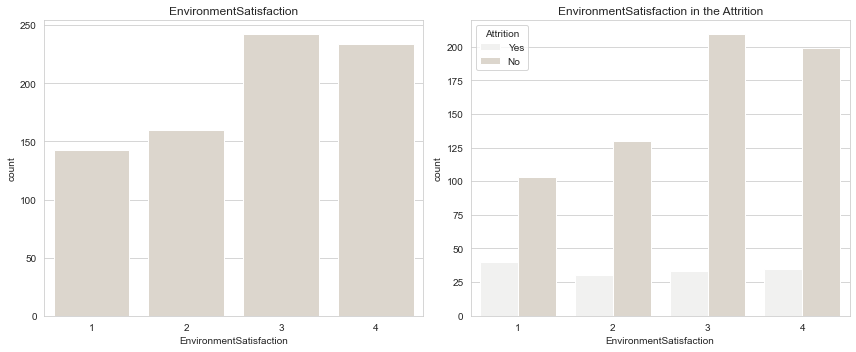

In [96]:
focus_feat = 'EnvironmentSatisfaction'

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.countplot(ax=axes[0], data=df, x=focus_feat, color = colors_nude[-1])
axes[0].set_title(f'{focus_feat}')

sns.countplot(ax=axes[1], data=df, x=focus_feat, color = colors_nude[-1], hue='Attrition')
axes[1].set_title(f'{focus_feat} in the Attrition')

plt.tight_layout();

<br>

**any relationship between JobRole & Attrition?**

<br>

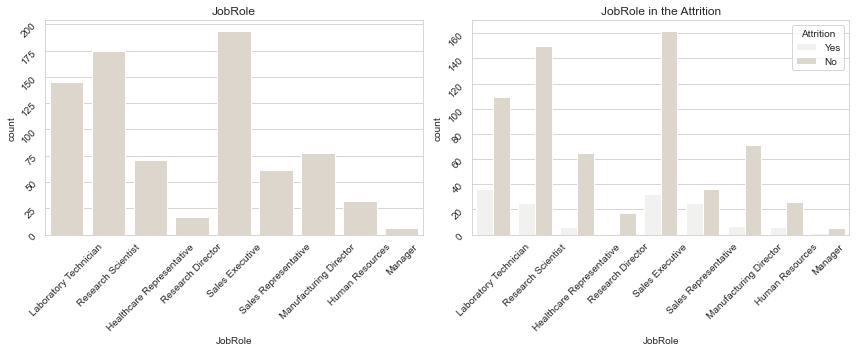

In [104]:
focus_feat = 'JobRole'

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.countplot(ax=axes[0], data=df, x=focus_feat, color = colors_nude[-1])
axes[0].set_title(f'{focus_feat}')
axes[0].tick_params(labelrotation=45)

sns.countplot(ax=axes[1], data=df, x=focus_feat, color = colors_nude[-1], hue='Attrition')
axes[1].set_title(f'{focus_feat} in the Attrition')
axes[1].tick_params(labelrotation=45)

plt.tight_layout();

<br>

**any relationship between OverTime & Attrition?**

<br>

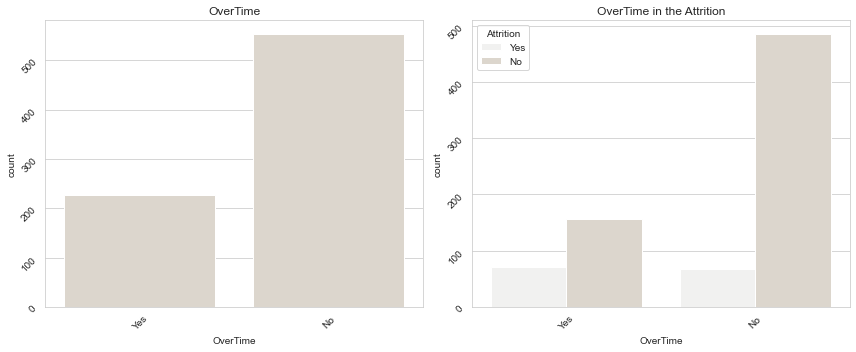

In [105]:
focus_feat = 'OverTime'

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.countplot(ax=axes[0], data=df, x=focus_feat, color = colors_nude[-1])
axes[0].set_title(f'{focus_feat}')
axes[0].tick_params(labelrotation=45)

sns.countplot(ax=axes[1], data=df, x=focus_feat, color = colors_nude[-1], hue='Attrition')
axes[1].set_title(f'{focus_feat} in the Attrition')
axes[1].tick_params(labelrotation=45)

plt.tight_layout();

# <b>3 <span style='color:#0386f7de'>|</span> Feature Engineering </b>

In [130]:
# group high cardinality - 
for col in df_cat.columns:
    print(df_cat[col].value_counts(normalize=True))
    print()

No     0.82285
Yes    0.17715
Name: Attrition, dtype: float64

Travel_Rarely        0.712452
Travel_Frequently    0.192555
Non-Travel           0.094994
Name: BusinessTravel, dtype: float64

Research & Development    0.629012
Sales                     0.329910
Human Resources           0.041078
Name: Department, dtype: float64

Life Sciences       0.409499
Medical             0.278562
Marketing           0.121951
Technical Degree    0.102696
Other               0.069320
Human Resources     0.017972
Name: EducationField, dtype: float64

Male      0.622593
Female    0.377407
Name: Gender, dtype: float64

Sales Executive              0.249037
Research Scientist           0.224647
Laboratory Technician        0.186136
Manufacturing Director       0.100128
Healthcare Representative    0.091142
Sales Representative         0.078306
Human Resources              0.041078
Research Director            0.021823
Manager                      0.007702
Name: JobRole, dtype: float64

Married     0.456

In [140]:
df_cat['EducationField'] = df_cat['EducationField'].replace(to_replace='Human Resources',value='Other')
df_cat['JobRole'] = df_cat['JobRole'].replace(to_replace=['Manager', 'Research Director', 'Human Resources'],
                                      value=['Other','Other','Other'])

In [141]:
# encode BusinessTravel column
df_cat['BusinessTravel'] = df_cat['BusinessTravel'].replace(to_replace=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
                                      value=[0,1,2])

In [145]:
df_cat_dummy = pd.get_dummies(df_cat.drop(labels='BusinessTravel', axis=1), drop_first=True)
df_cat_dummy = pd.concat([df_cat_dummy, df_cat['BusinessTravel']], axis=1)
df_cat_dummy.head()

,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Other,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel
0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2
2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,2
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1


In [147]:
df_f_eng = pd.concat([df_cat_dummy, df_num], axis=1)

X = df_f_eng.drop(labels='Attrition_Yes', axis=1)
y = df_f_eng['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


print(f'X_train = {len(X_train)}')
print(f'X_test = {len(X_test)}')
print(f'y_train = {len(y_train)}')
print(f'y_test = {len(y_test)}')

X_train = 545
X_test = 234
y_train = 545
y_test = 234


<div style="color:white;display:fill;border-radius:8px;
            background-color:Red;font-size:120%;
            font-family:Railway;letter-spacing:0.5px">
    <p style="padding: 8px;color:White;"><b>Checkpoint</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [159]:
# checkpoint
dump_pkl(df_f_eng, '.\\datasets\\df_3.pkl')

In [149]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
# imbalance check
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

Imbalance check
0    0.834862
1    0.165138
Name: Attrition_Yes, dtype: float64

0    0.794872
1    0.205128
Name: Attrition_Yes, dtype: float64


In [155]:
# balance dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X_train_scaled, y_train)

In [157]:
print(y_oversampled.value_counts(normalize=True))

0    0.5
1    0.5
Name: Attrition_Yes, dtype: float64


# <b>4 <span style='color:#0386f7de'>|</span> Modeling </b>

In [160]:
random_state = 0
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

In [163]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

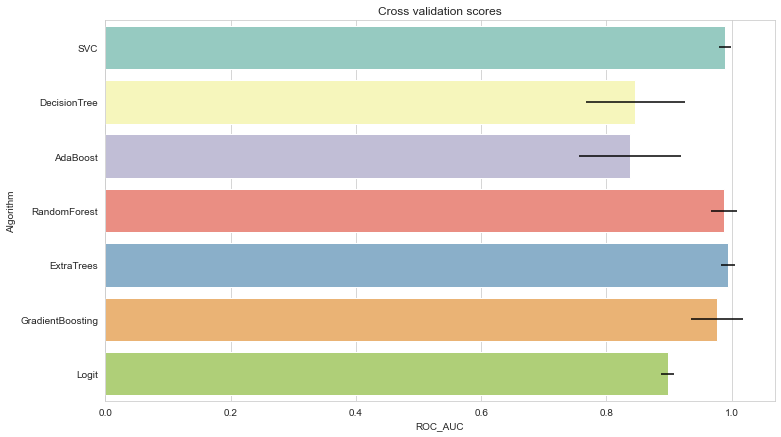

In [167]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_oversampled, y_oversampled, scoring = "roc_auc", cv =5, n_jobs=-1))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors":cv_std,
                       "Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting","Logit"]})

fig = plt.figure(figsize=(12,7))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("ROC_AUC")
g = g.set_title("Cross validation scores")

In [168]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [2, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10,scoring="roc_auc", n_jobs= -1)
gsRFC.fit(X_oversampled , y_oversampled)
gsRFC.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=300)

In [169]:
gsRFC.best_score_

0.9886473429951691

In [181]:
confusion_matrix(y_test, y_hat)

array([[184,   2],
       [ 41,   7]], dtype=int64)

<Figure size 864x864 with 0 Axes>

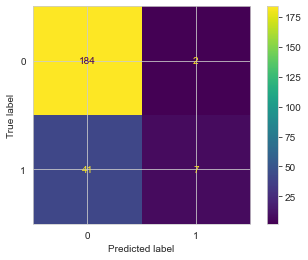

In [182]:
plot_confusion_matrix(gsRFC, X_test_scaled, y_test)

In [176]:
y_hat = gsRFC.predict(X_test_scaled)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       186
           1       0.78      0.15      0.25        48

    accuracy                           0.82       234
   macro avg       0.80      0.57      0.57       234
weighted avg       0.81      0.82      0.76       234



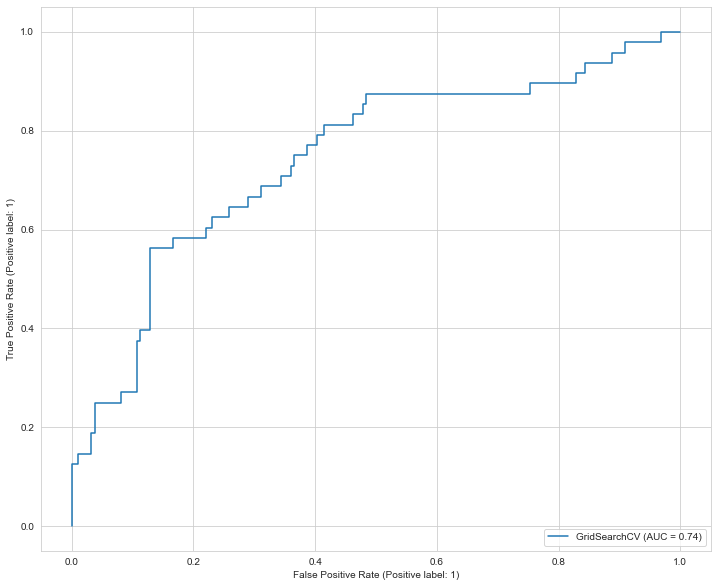

In [173]:
fig, ax = plt.subplots(figsize=(12,10)) 
plot_roc_curve(gsRFC, X_test_scaled, y_test, ax=ax)

# <b>5 <span style='color:#0386f7de'>|</span> Finalize Model </b>

In [183]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

RFC = RandomForestClassifier(bootstrap=False, 
                             max_features=3, 
                             min_samples_leaf=2,
                            min_samples_split=3, 
                             n_estimators=300)

RFC.fit(X, y)

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=300)

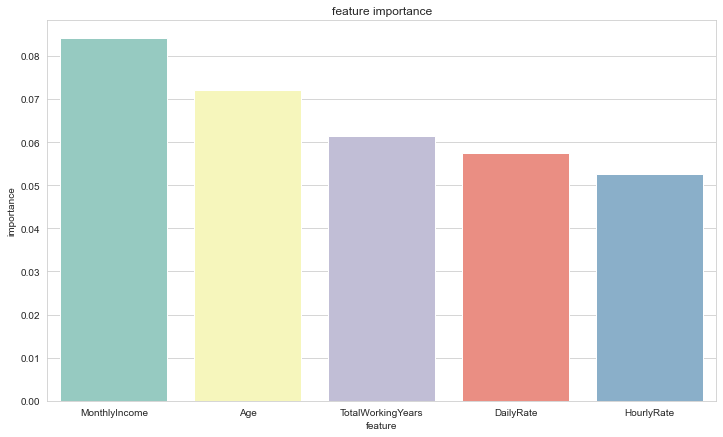

In [200]:
feat_impo = pd.DataFrame(data=[X.columns, RFC.feature_importances_])
feat_impo = feat_impo.transpose()
feat_impo.columns = ["feature", "importance"]
feat_impo.sort_values("importance", ascending=False, inplace=True)
feat_impo.reset_index(drop=True, inplace=True)


# top 5 feature importances
fig = plt.figure(figsize=(12,7))
g = sns.barplot(x="feature", y="importance", data=feat_impo.head(), palette="Set3", orient = "v",)
g.set_xlabel("feature")
g.set_ylabel("importance")
g = g.set_title("feature importance")